In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

!pip install seaborn


In [2]:
from google.colab import files
uploaded = files.upload()

import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['cardio_train.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/')
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')


Saving cardio_train.csv.zip to cardio_train.csv.zip


In [3]:
df.head()

df.info()

df.isnull().sum()

df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


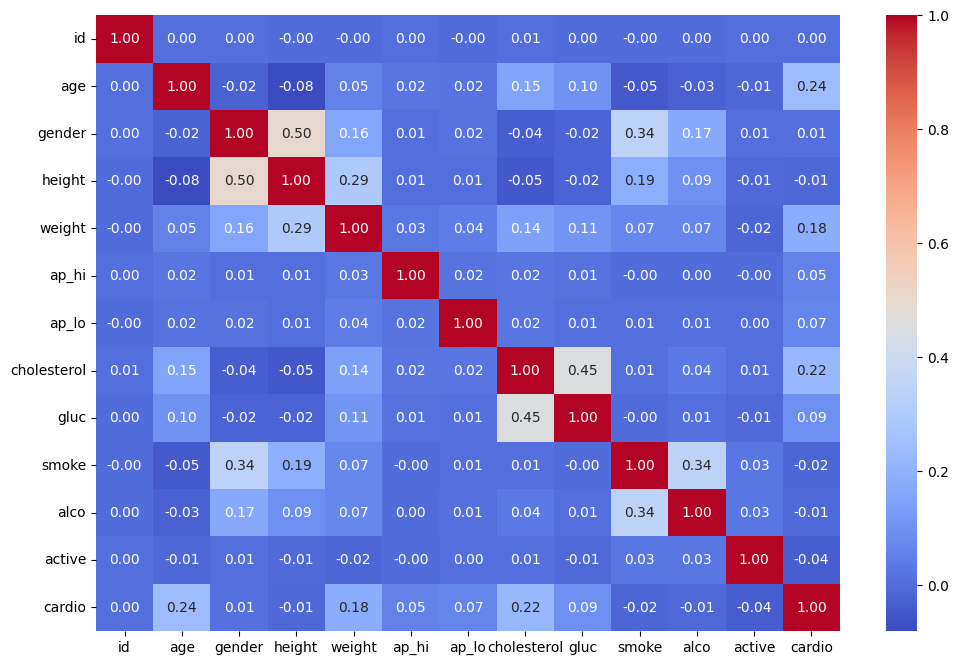

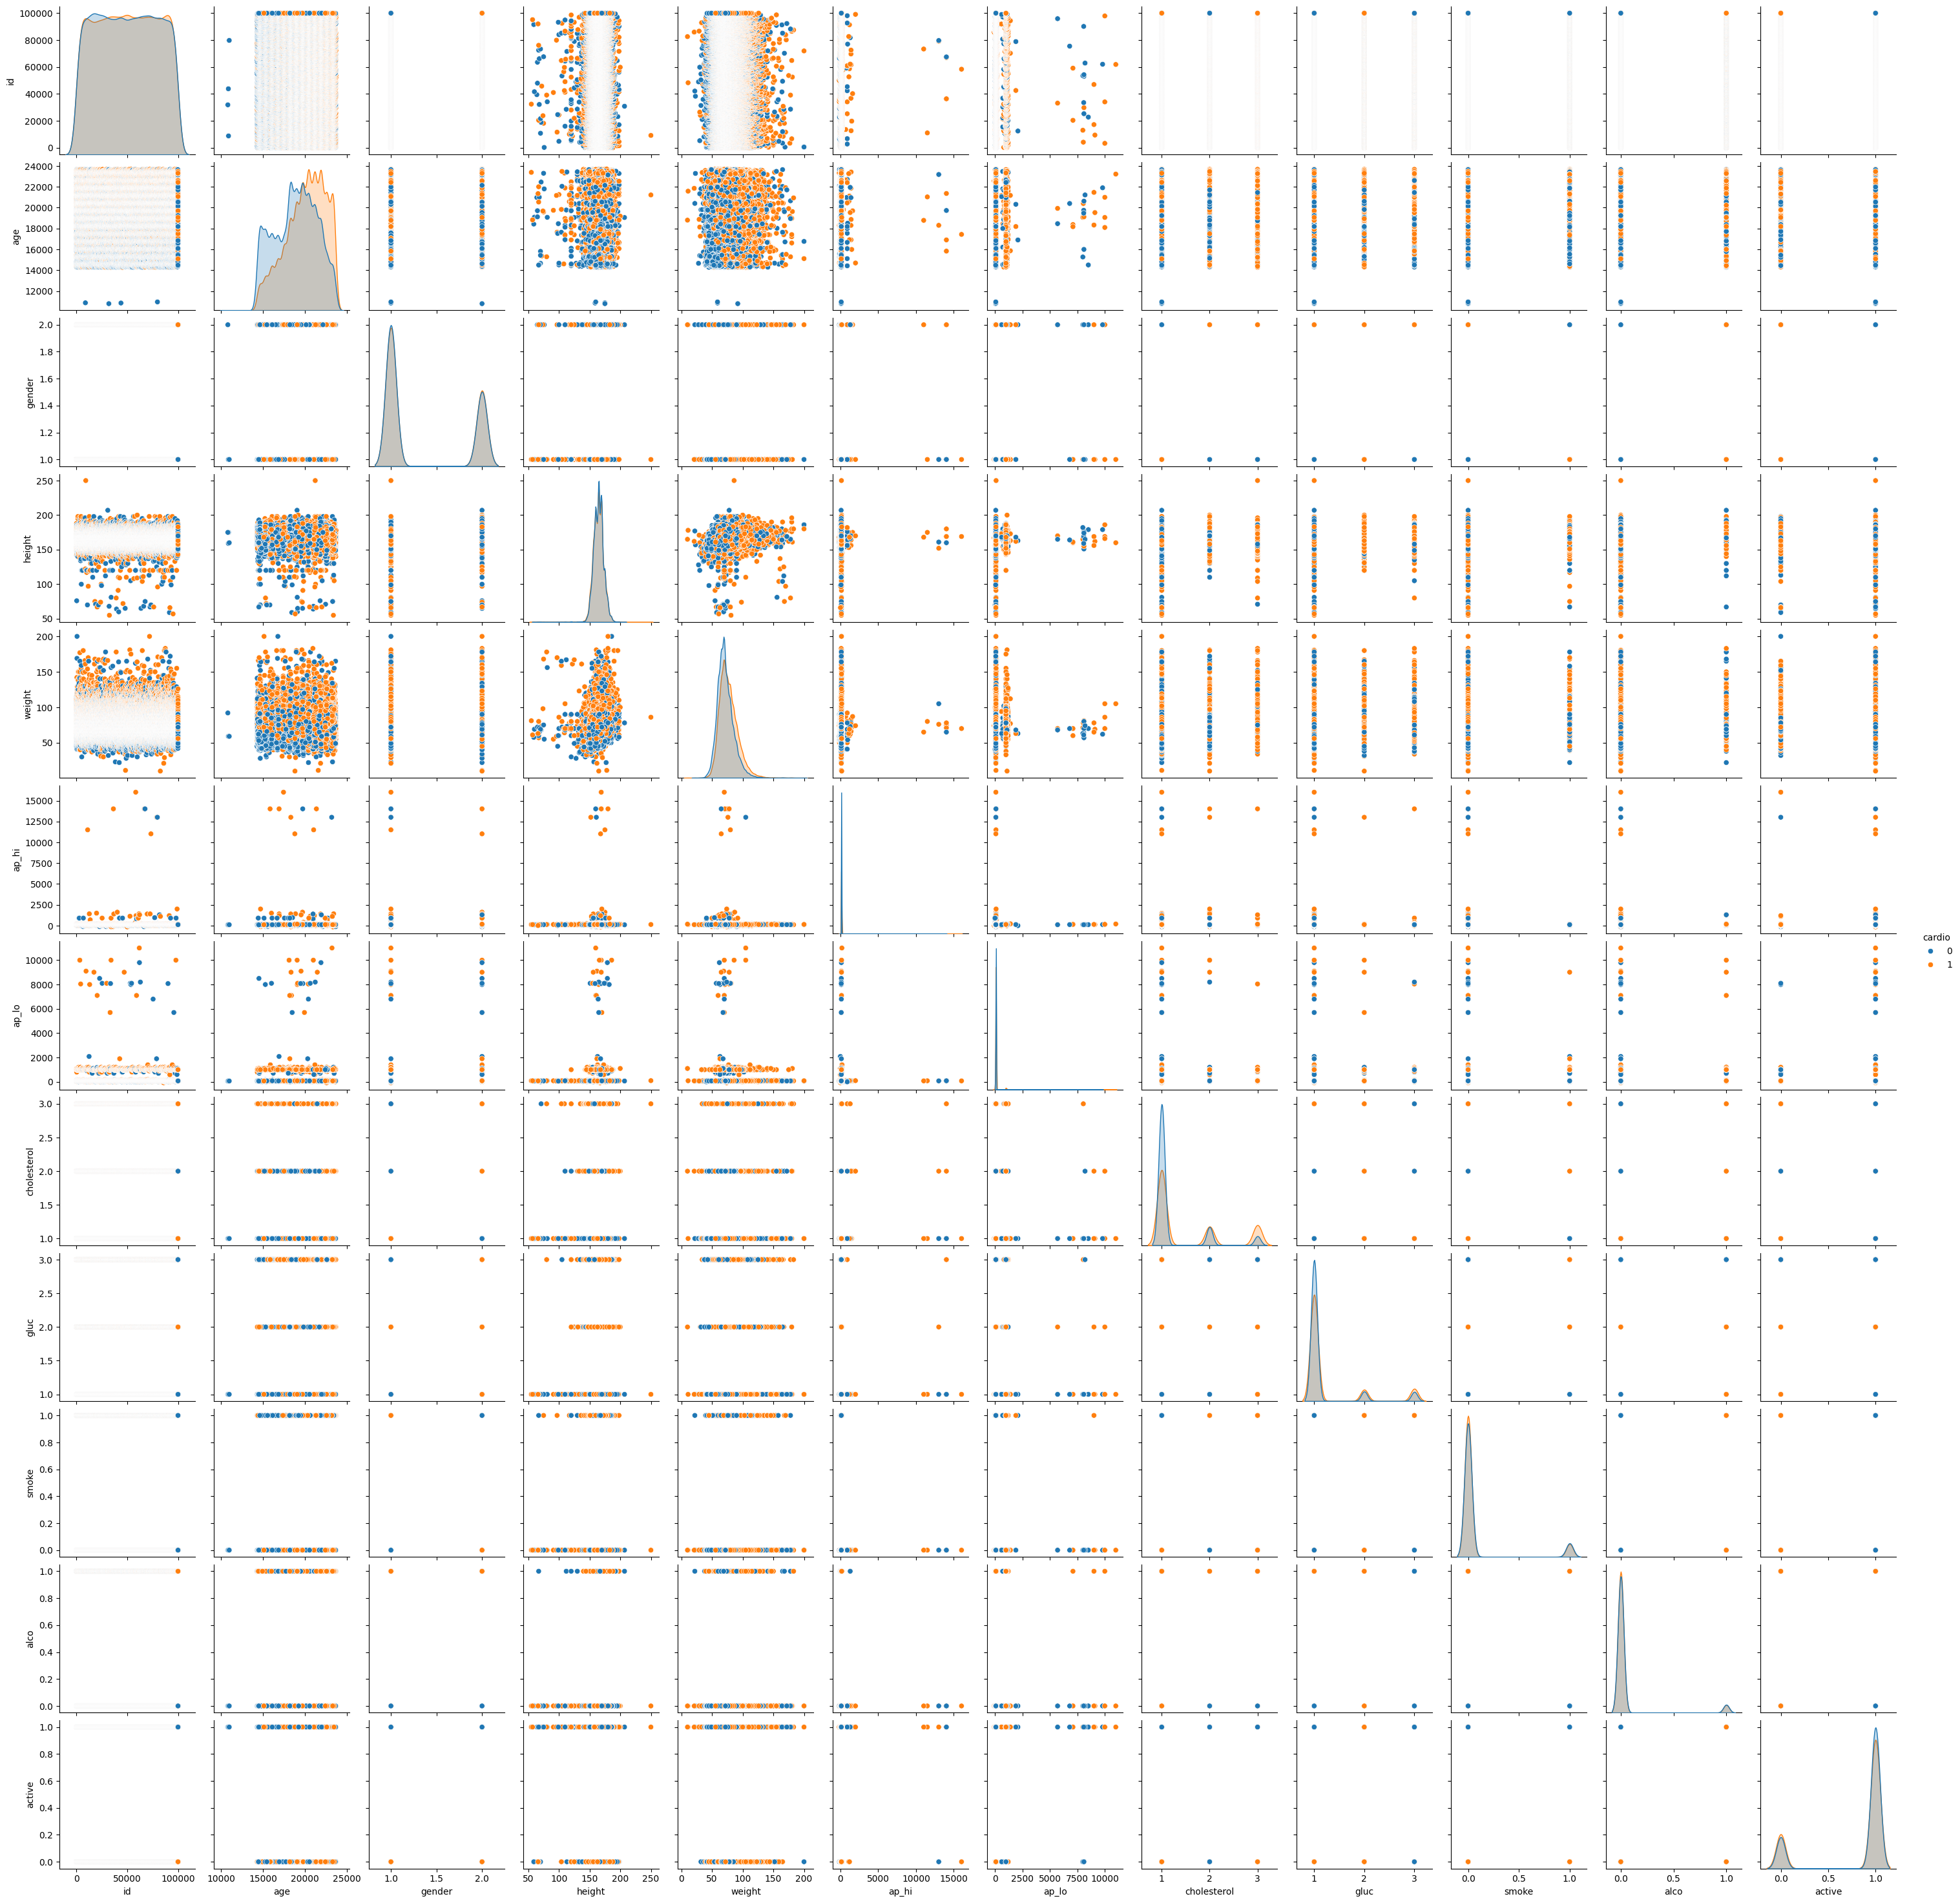

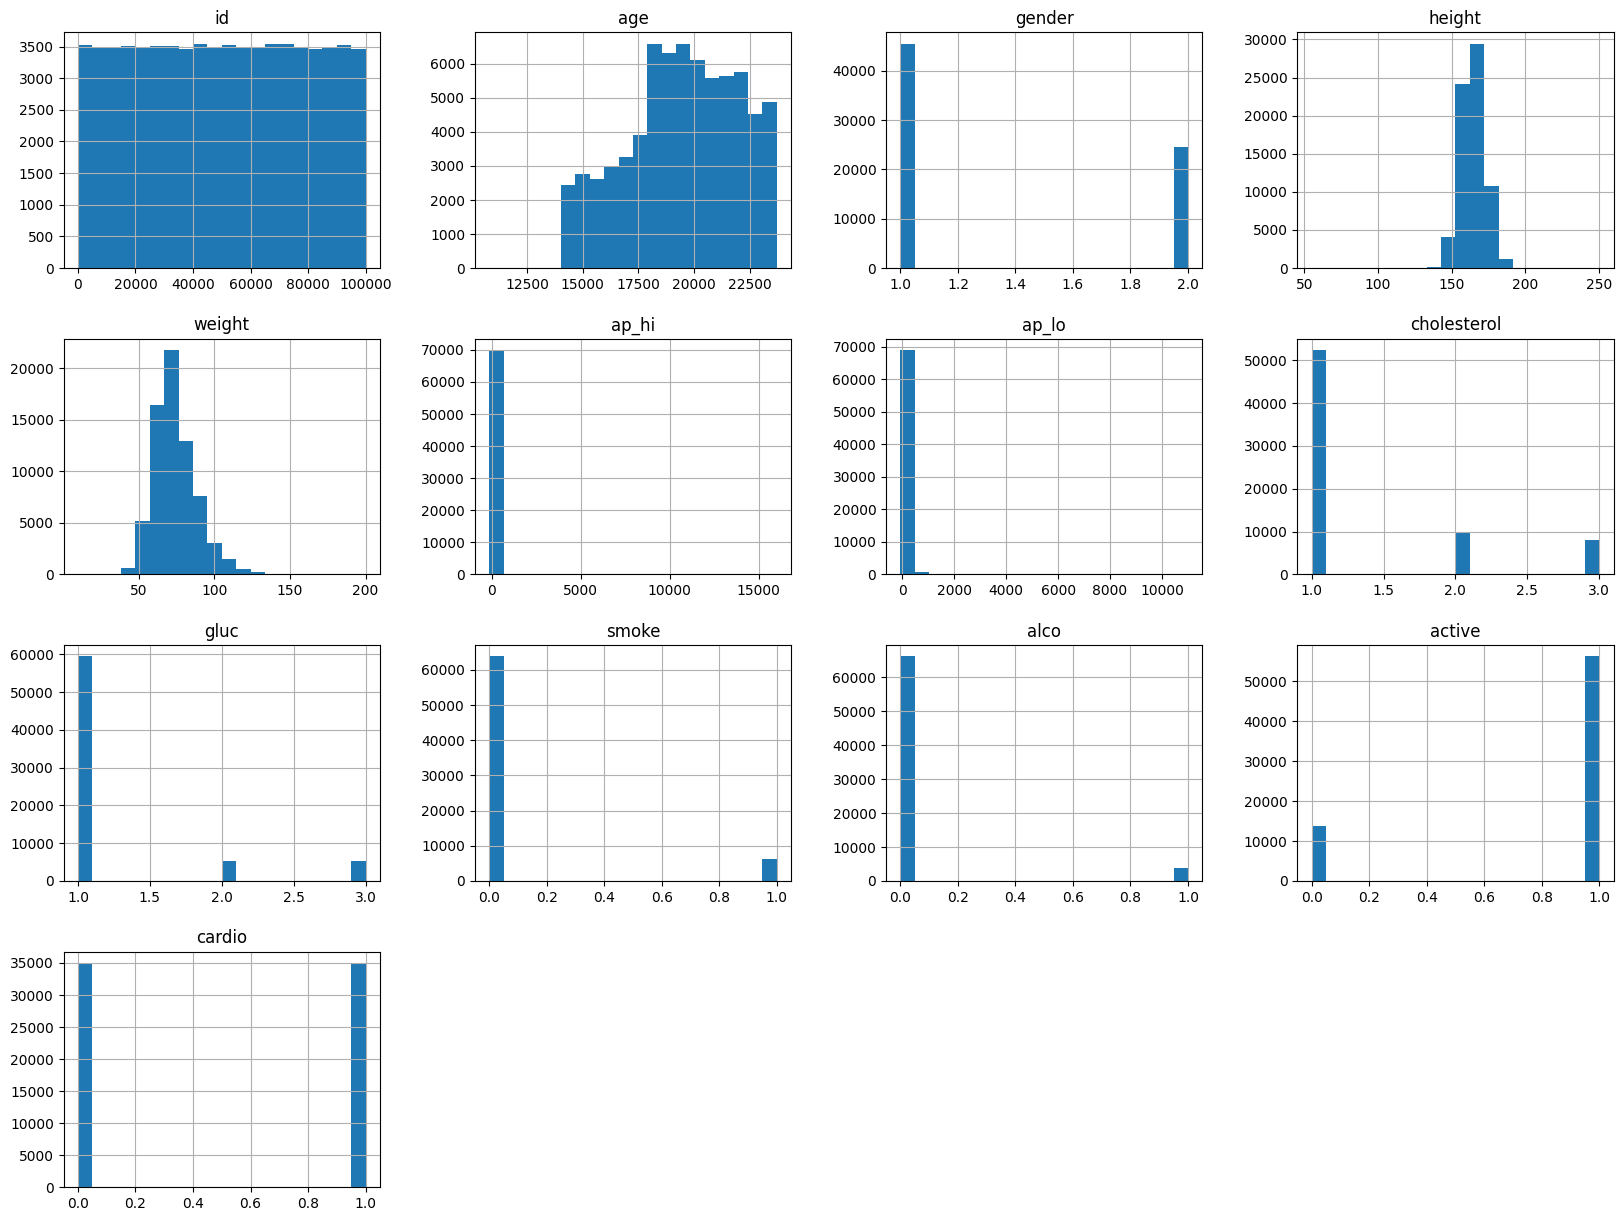

In [4]:
df.describe()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
sns.pairplot(df, hue="cardio")
plt.show()
df.hist(bins=20, figsize=(20, 15))
plt.show()


In [5]:
X = df.drop("cardio", axis=1)
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7298571428571429
[[5325 1663]
 [2119 4893]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [7]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.6278571428571429
[[4466 2522]
 [2688 4324]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6988
           1       0.63      0.62      0.62      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.6310714285714286
[[4363 2625]
 [2540 4472]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.7234285714285714
[[5362 1626]
 [2246 4766]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7237142857142858
[[5219 1769]
 [2099 4913]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [11]:
results = {
    "Model": ["SVM", "KNN", "Decision Tree", "Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, svm_pred),
                 accuracy_score(y_test, knn_pred),
                 accuracy_score(y_test, dt_pred),
                 accuracy_score(y_test, lr_pred),
                 accuracy_score(y_test, rf_pred)]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0                  SVM  0.729857
1                  KNN  0.627857
2        Decision Tree  0.631071
3  Logistic Regression  0.723429
4        Random Forest  0.723714


In [13]:
import pandas as pd

accuracy_scores = {
    "Model": ["SVM", "KNN", "Decision Tree", "Logistic Regression", "Random Forest"],
    "Accuracy": [0.729857, 0.627857, 0.631071, 0.723429, 0.723714]
}

accuracy_df = pd.DataFrame(accuracy_scores)

best_model = accuracy_df.loc[accuracy_df["Accuracy"].idxmax()]

print("Best Model based on Accuracy:")
print(best_model)


Best Model based on Accuracy:
Model            SVM
Accuracy    0.729857
Name: 0, dtype: object


In [14]:
import joblib
from google.colab import files

best_model_name = "SVM"
best_model_accuracy = 0.729857

best_model = svm_model
joblib.dump(best_model, f'{best_model_name}_model_accuracy_{best_model_accuracy}.joblib')

files.download(f'{best_model_name}_model_accuracy_{best_model_accuracy}.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>